In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import numpy as np

In [2]:
# Datos
X, y = make_moons(n_samples=100, noise=0.35, random_state=42)
labels = ["Clase 0", "Clase 1"]

# División entre entrenamiento y evaluación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Entrenamiento del decision tree
dt = DecisionTreeClassifier(criterion="gini", ccp_alpha=0.3, random_state=42)
dt.fit(X_train, y_train)

# Entrenamiento del random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_dt_pred = dt.predict(X_val)
y_rf_pred = rf.predict(X_val)

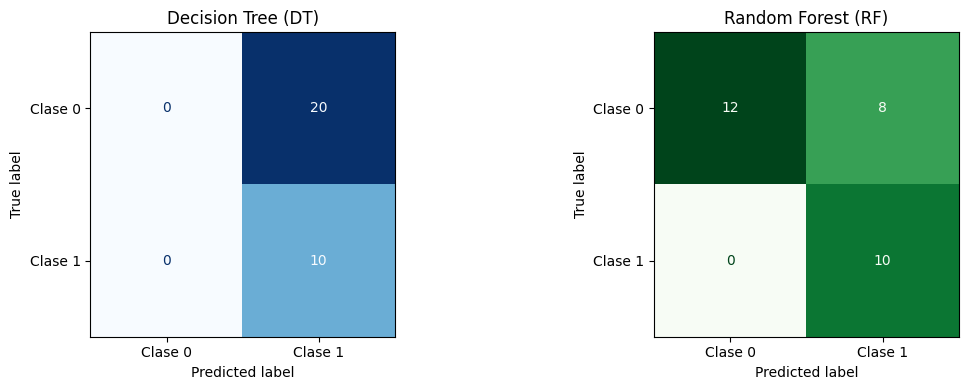

In [4]:
# Matrices de confusión
cm_dt = confusion_matrix(y_val, y_dt_pred)
cm_rf = confusion_matrix(y_val, y_rf_pred)

# Gráficos de matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ConfusionMatrixDisplay(cm_dt, display_labels=labels).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Decision Tree (DT)")

ConfusionMatrixDisplay(cm_rf, display_labels=labels).plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("Random Forest (RF)")

plt.tight_layout()
plt.show()

In [5]:
# Métricas
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
dt_scores = [
    accuracy_score(y_val, y_dt_pred),
    precision_score(y_val, y_dt_pred),
    recall_score(y_val, y_dt_pred),
    f1_score(y_val, y_dt_pred)
]
rf_scores = [
    accuracy_score(y_val, y_rf_pred),
    precision_score(y_val, y_rf_pred),
    recall_score(y_val, y_rf_pred),
    f1_score(y_val, y_rf_pred)
]

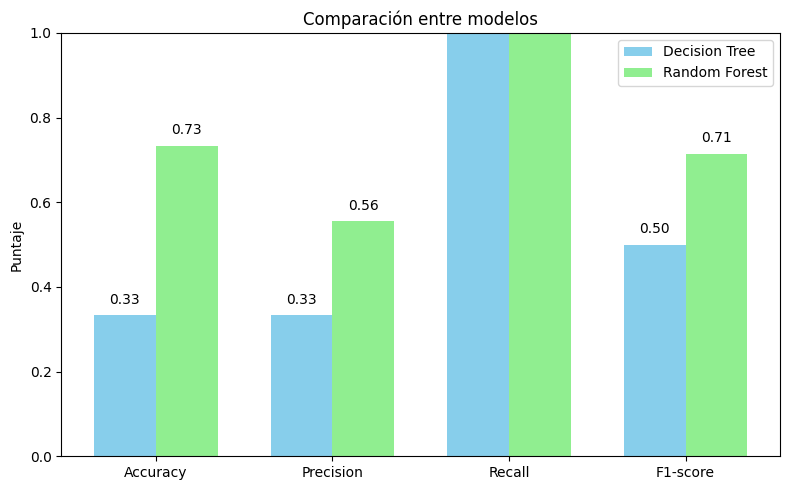

In [6]:
# Gráfico de métricas
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, dt_scores, width, label="Decision Tree", color="skyblue")
bars2 = ax.bar(x + width/2, rf_scores, width, label="Random Forest", color="lightgreen")

ax.set_ylabel("Puntaje")
ax.set_title("Comparación entre modelos")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        if yval != 1.0:
            ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()